# NLP – SENTIMENT ANALYSIS (DEEP LEARNING) FOR MOVIE REVIEWS

## Project Group Number - 7

## Team Members
#### -> Kaushik Patil : 1001928970
#### -> Chetana Kotha : 1002067826
#### -> Harihar Omkarachari Suprith Kumar : 1001880333

## Importing the libraries

Here we are importing all the packages required for our code to perform the data preprocessing steps.

Firstly we make sure we have have all the packages below downloaded to the local system. We then import the packages to the python notebook to use in our code. 

In [1]:
# We are importing pandas library here which will be used to store the data and process it in a dataframe
import pandas as pd 

# We are importing numpy library which we are using for numerical analysis
import numpy as np 

# Here we are importing the string library which we will be using to 
import string

# We are importing nltk library to perform tasks regarding the natural language processing
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

# Here we are importing WordNetLemmatizer from nltk.stem library for the pre processing step of lemmatization
from nltk.stem import WordNetLemmatizer

# Here we are importing the train_test_split for splitting the dataset into train and testing
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
#from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from keras.models import Sequential

from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, SimpleRNN, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization

import matplotlib.pyplot as plt

import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaushikpatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kaushikpatil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaushikpatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaushikpatil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/kaushikpatil/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


## Importing the dataset

Here we have the dataset stored in local folder, in the same location as the project code. The dataset is in a csv format which consists of 2 columns, text(which includes the review of the movie) and label(which includes the sentiment of the review).

In the following step we are importing the dataset and storing in local variable called dataframe. We are also printing the first 15 rows of the dataset.

In [2]:
# Reading the csv file which needs to be in same folder as the code and copying them to a dataframe variable
dataframe = pd.read_csv('movie_reviews.csv')

# Printing the first 15 rows of the dataset stored in dataframe
dataframe.head(15)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


## Data pre-processing

#### Checking for null values

Below we are checking if there are any null values in the dataset and counting for the number of null values for each column. We are then trying to print null value count for each columns below.

In [3]:
# We are checking for the total number of null values in the data frame
totalNullCount = dataframe.isnull().sum()

# We are retrieving the list of the columns with null values and storing the list to a variable
columnsWithNulls = totalNullCount[totalNullCount > 0]

# We are printing the list of columns which have null values. If we find any we can handle them.
print(columnsWithNulls)

Series([], dtype: int64)


#### Handling the punctuations 

Here we are removing all the punctuations from the dataset. We have defined a method that takes each row of the data and removes punctuation from each and replaces them with no characters. 

In [4]:
# Here we are defining a method to handle the removal of punctuations row by row
def removePunctuations(reviewData):
    for punctuation in string.punctuation:
        reviewData = reviewData.replace(punctuation, '')
    return reviewData

# Here we are running the removePunctuations method for each and every row of text column
dataframe['text'] = dataframe['text'].apply(removePunctuations)

#### Converting all characters to lower case

Here we are converting all the characters to lower case to maintain consistency. Changing characters to lowercase promotes uniformity, enhances text normalization, and decreases vocabulary size, enabling precise text analysis and comparisons between various scenarios.

In [5]:
# We are converting all the characters of text column in dataframe to lower case
dataframe['text'] = dataframe['text'].str.lower()

#### Removing Stopwords

Here we are removing stop words from our dataset. By lowering dimensionality, accelerating processing, and boosting the usefulness of text analysis, removing stopwords from a dataset in natural language processing helps to increase efficiency and accuracy. By concentrating on contextually meaningful terms, it results in superior performance in tasks like sentiment analysis, topic modeling, and text categorization.

In [6]:
# Here we are defining the list of Stop words we identified and created the list. We will checking for these stop words and will remove them
stopWordList = ["whats", "whos", "were", "its", "isnt", "themselves", "theyll", "theyre", 
                "this", "those", "through", "then", "thatll", "that", "thatd", "these", 
                "theres", "theirs", "their", "them", "themselves", "she", "shed", "shell", 
                "shes", "shouldve", "should", "shouldnt", "so", "some", "such", "than", "that", 
                "thats", "the", "their", "theirs", "them", "themselves", "they", "this", "those", 
                "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
                "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
                "against", "between", "into", "through", "during", "before", "after", "above", 
                "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
                "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", 
                "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", 
                "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", 
                "will", "just", "dont", "shouldve", "now", "d", "ll", "m", "o", "re", "ve", "y", 
                "ain", "arent", "couldnt", "didnt", "doesnt", "hadnt", "hasnt", "havent", "isnt", 
                "ma", "mightnt", "mustnt", "neednt", "shant", "shouldnt", "wasnt", "werent", "won", 
                "wont", "wouldnt", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", 
                "you", "youre", "youve", "youll", "youd", "your", "yours", "yourself", "yourselves", 
                "he", "him", "his", "himself", "her", "hers", "herself", "it", "it's", "itself", 
                "what", "which", "who", "whom"]

# We are removing the stopwords by defining a user defined method.
def removeStopwords(reviewData, stopWordList):
    eachReview = reviewData.split()
    reviewDataList = []
    for reviewWord in eachReview:
        if reviewWord not in stopWordList:
            reviewDataList.append(reviewWord.strip())
    return " ".join(reviewDataList)

# Here we are iterating through each row of text column and calling user defined method and storing to the same text again
for i in dataframe.index:
    dataframe.loc[i, 'text'] = removeStopwords(dataframe.loc[i, 'text'], stopWordList)

## Splitting the dataset into training and testing data

Here we are converting the dataset into training and testing data. We are considering 80% of the data for training the model and the remaining 20% of the data for testing the model. We are using the function train_test_split from the sklearn library for this process.

In [7]:
# Splitting into train and test
train_data, test_data = train_test_split(dataframe, test_size=0.2, random_state=42)

# Train dataset
X_train, Y_train = train_data['text'], train_data['label']

# Test dataset
X_test, Y_test = test_data['text'], test_data['label']

## Word2Vec Embedding implementation

Here we are implementing the embedding process and specifically implementing the Word2vec implementation. Here we are initializing a WordNetLemmatizer and then tokenizing the given training sentences. With the defined method we are retrieving the vector for the word.

In [8]:
lemmatizer = WordNetLemmatizer()
tokenized_sentences = [word_tokenize(text) for text in X_train]
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Function to get Word2Vec vectors for sentences
def get_word2vec_vectors(sentences, model):
    vectors = []
    for sentence in sentences:
        sentence_vectors = []
        for word in sentence:
            lemma = lemmatizer.lemmatize(word)
            if lemma in model.wv:
                sentence_vectors.append(model.wv[lemma])
        vectors.append(sentence_vectors)
    return vectors

# Get Word2Vec vectors for train and test data
X_train_word2vec = get_word2vec_vectors([word_tokenize(text) for text in X_train], word2vec_model)
X_test_word2vec = get_word2vec_vectors([word_tokenize(text) for text in X_test], word2vec_model)

## Padding

Here we are implementing padding to maintain a constant input shape for the model. We are using the pad_sequences from the library to perform the padding operation. Here for the sequences shorter than the specified length, it appends 0s to it. 

In [9]:
# Pad sequences for consistent input shape
max_sequence_length = 100  # Set maximum sequence length (you can adjust this based on your data)
X_train_pad = pad_sequences(X_train_word2vec, maxlen=max_sequence_length, dtype='float32')
X_test_pad = pad_sequences(X_test_word2vec, maxlen=max_sequence_length, dtype='float32')

## Confusion Matrix 

Here we are defining a method to plot the confusion matrix for each and every model performance.

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

## LSTM Model Implementation

Here we are implmenting the LSTM model. We are defining the LSTM model with 128 units and an input shape. The LSTM layer here learns from the word2vec model that we created earlier. Following the LSTM layer we have the dense layer with 1 unit and also a sigmoid activation function for the process of binary classification.

The model is trained using the training data after all the preprocessing steps. We are running it for 5 epochs witha batch size of 64. We then evaluate the model's performance. We are printing the test accuracy of the model.

In [11]:
# We are building the LSTM model
embedding_dim = 100  # Dimensionality of the word embeddings
model = Sequential()
model.add(LSTM(256, input_shape=(max_sequence_length, embedding_dim)))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, Y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_pad, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2023-11-21 02:01:03.260953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
450/450 [==============================] - 114s 251ms/step - loss: 0.3983 - accuracy: 0.8207 - val_loss: 0.3625 - val_accuracy: 0.8444
Epoch 2/5
450/450 [==============================] - 113s 252ms/step - loss: 0.3191 - accuracy: 0.8627 - val_loss: 0.3109 - val_accuracy: 0.8684
Epoch 3/5
450/450 [==============================] - 114s 253ms/step - loss: 0.2859 - accuracy: 0.8791 - val_loss: 0.3171 - val_accuracy: 0.8584
Epoch 4/5
450/450 [==============================] - 113s 251ms/step - loss: 0.2577 - accuracy: 0.8920 - val_loss: 0.2957 - val_accuracy: 0.8775
Epoch 5/5
250/250 [==============================] - 12s 47ms/step - loss: 0.3120 - accuracy: 0.8783
Test Accuracy: 87.83%


Here we are plotting a graph to evaluate the model's performance by comparing the model accuracy.

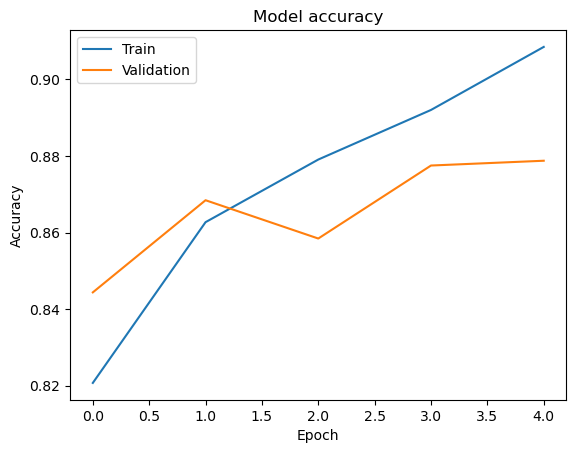

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Here below we are constructing and plotting the confusion matrix

250/250 [==============================] - 12s 46ms/step


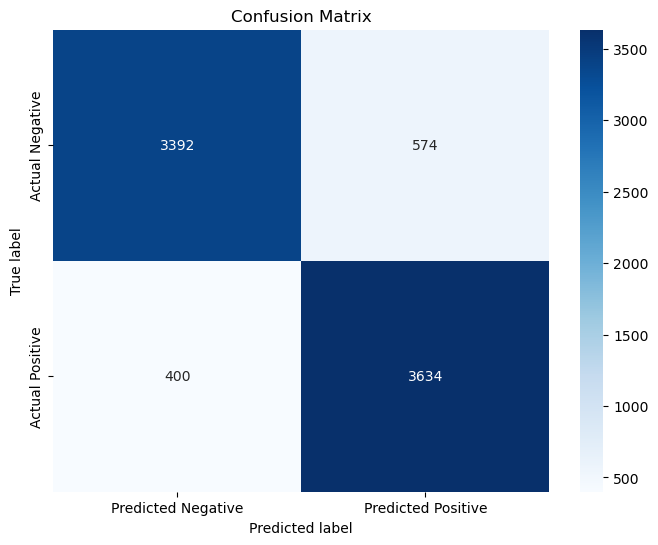

In [13]:
# Evaluate the model predictions on test data
predictions = model.predict(X_test_pad)
binary_predictions = np.round(predictions).flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, binary_predictions)

# Display the confusion matrix graphically
plot_confusion_matrix(conf_matrix)

## CNN Model Implementation

Here we are implementing the CNN model. We are initializing a sequential neural network model. A 1D convolutional layer with 256 filters and a kernel size of 5 makes up this model. Additionally, we include a dense layer with a single unit and sigmoid activation for binary classification, as well as a global max-pooling layer. 

Binary cross-entropy loss, the Adam optimizer, and accuracy are used in the model's compilation as the evaluation metrics. The model is then trained by passing it the training set. Ten percent of the training data is set aside for validation, and the training is carried out in batches of 64 samples. 

We then evaluate the model and we are showing the model accuracy we achieved.

In [14]:
# We are defining the CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(256, 5, activation='relu', input_shape=(max_sequence_length, embedding_dim)))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_pad, Y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the CNN model on test data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pad, Y_test)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

Epoch 1/5
450/450 [==============================] - 12s 26ms/step - loss: 0.4193 - accuracy: 0.8064 - val_loss: 0.3590 - val_accuracy: 0.8403
Epoch 2/5
450/450 [==============================] - 12s 27ms/step - loss: 0.2928 - accuracy: 0.8752 - val_loss: 0.3594 - val_accuracy: 0.8372
Epoch 3/5
450/450 [==============================] - 12s 27ms/step - loss: 0.2231 - accuracy: 0.9108 - val_loss: 0.3374 - val_accuracy: 0.8569
Epoch 4/5
450/450 [==============================] - 12s 28ms/step - loss: 0.1732 - accuracy: 0.9354 - val_loss: 0.3716 - val_accuracy: 0.8447
Epoch 5/5
250/250 [==============================] - 2s 6ms/step - loss: 0.4060 - accuracy: 0.8436
CNN Test Accuracy: 84.36%


Here we are plotting a graph to evaluate the model's performance by comparing the model accuracy.

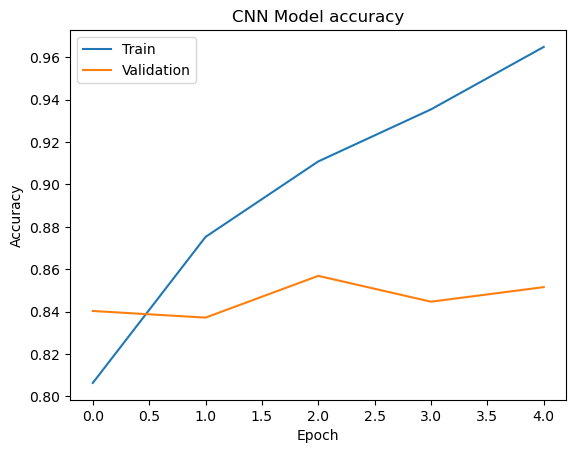

In [15]:
# Plot CNN training & validation accuracy values
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Here below we are constructing and plotting the confusion matrix

250/250 [==============================] - 2s 7ms/step


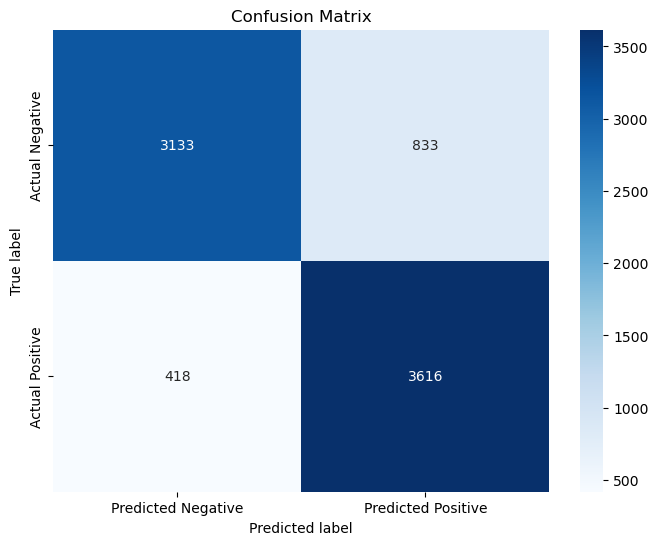

In [16]:
# Evaluate the model predictions on test data
predictions = cnn_model.predict(X_test_pad)
binary_predictions = np.round(predictions).flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, binary_predictions)

# Display the confusion matrix graphically
plot_confusion_matrix(conf_matrix)

## RNN Model Implementation

Here we are implementing the RNN model. We are initializing a sequential neural network model. A 1D convolutional layer with 256 filters and a kernel size of 5 makes up this model. We are adding a dropout for regularization. Additionally, we include a dense layer with a single unit and sigmoid activation for binary classification, as well as a global max-pooling layer. 

Binary cross-entropy loss, the Adam optimizer, and accuracy are used in the model's compilation as the evaluation metrics. The model is then trained by passing it the training set. Ten percent of the training data is set aside for validation, and the training is carried out in batches of 64 samples. 

We then evaluate the model and we are showing the model accuracy we achieved.

In [21]:
# We are building the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(256, input_shape=(max_sequence_length, embedding_dim)))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the RNN model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_pad, Y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the RNN model on test data
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, Y_test)
print(f"RNN Test Accuracy: {rnn_accuracy * 100:.2f}%")

Epoch 1/5
450/450 [==============================] - 19s 41ms/step - loss: 0.6188 - accuracy: 0.6627 - val_loss: 0.5547 - val_accuracy: 0.7406
Epoch 2/5
450/450 [==============================] - 19s 42ms/step - loss: 0.6258 - accuracy: 0.6476 - val_loss: 0.5717 - val_accuracy: 0.7144
Epoch 3/5
450/450 [==============================] - 19s 42ms/step - loss: 0.6068 - accuracy: 0.6725 - val_loss: 0.7797 - val_accuracy: 0.6119
Epoch 4/5
450/450 [==============================] - 19s 43ms/step - loss: 0.6095 - accuracy: 0.6648 - val_loss: 0.5858 - val_accuracy: 0.6900
Epoch 5/5
250/250 [==============================] - 3s 11ms/step - loss: 0.5260 - accuracy: 0.7442
RNN Test Accuracy: 74.42%


Here we are plotting a graph to evaluate the model's performance by comparing the model accuracy.

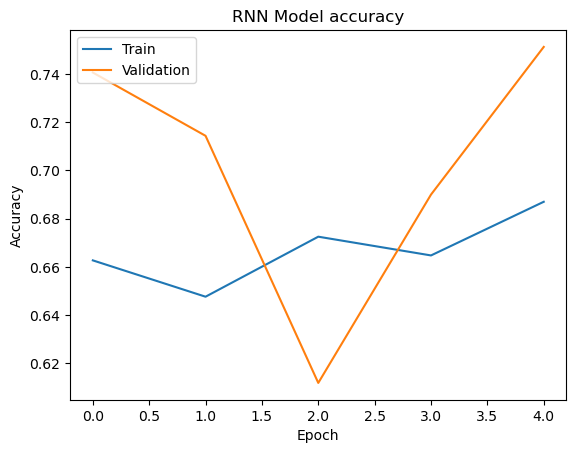

In [22]:
# Plot RNN training & validation accuracy values
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Here below we are constructing and plotting the confusion matrix

250/250 [==============================] - 3s 11ms/step


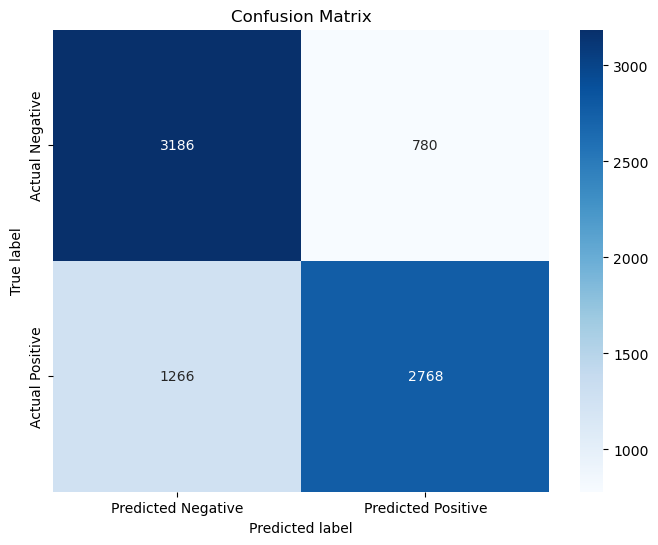

In [23]:
# Evaluate the model predictions on test data
predictions = rnn_model.predict(X_test_pad)
binary_predictions = np.round(predictions).flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, binary_predictions)

# Display the confusion matrix graphically
plot_confusion_matrix(conf_matrix)

## Bidirectional LSTM

Here we are constructing a bidirectional LSTM model. The dimensionality of the word embeddings is indicated by the embedding_dim, which is set to 100. The architecture starts with a sequential model and adds a 256-unit bidirectional LSTM layer to it. For binary classification problems, the next layer is a Dense layer with a single unit that uses a sigmoid activation function. 

The model is constructed with the Adam optimizer, which optimizes towards accuracy metrics, and binary cross-entropy as the loss function. 10% of the training data is used for validation while it is trained using training data across 5 epochs with a batch size of 64. Lastly, the test accuracy is reported as a % with two decimal places for interpretation and evaluation of the model's performance on unknown data. The model's performance is assessed on the test data.

In [24]:
# We are building the BiLSTM model
embedding_dim = 100  # Dimensionality of the word embeddings
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(256, input_shape=(max_sequence_length, embedding_dim))))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
bi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
bi_lstm_history = bi_lstm_model.fit(X_train_pad, Y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_pad, Y_test)
print(f"Test Accuracy: {bi_lstm_accuracy * 100:.2f}%")

Epoch 1/5
450/450 [==============================] - 180s 397ms/step - loss: 0.3989 - accuracy: 0.8189 - val_loss: 0.3353 - val_accuracy: 0.8503
Epoch 2/5
450/450 [==============================] - 182s 405ms/step - loss: 0.3225 - accuracy: 0.8611 - val_loss: 0.3361 - val_accuracy: 0.8591
Epoch 3/5
450/450 [==============================] - 192s 426ms/step - loss: 0.2831 - accuracy: 0.8805 - val_loss: 0.3013 - val_accuracy: 0.8725
Epoch 4/5
450/450 [==============================] - 184s 409ms/step - loss: 0.2544 - accuracy: 0.8952 - val_loss: 0.2914 - val_accuracy: 0.8728
Epoch 5/5
250/250 [==============================] - 17s 65ms/step - loss: 0.3125 - accuracy: 0.8723
Test Accuracy: 87.23%


Here we are plotting a graph to evaluate the model's performance by comparing the model accuracy.

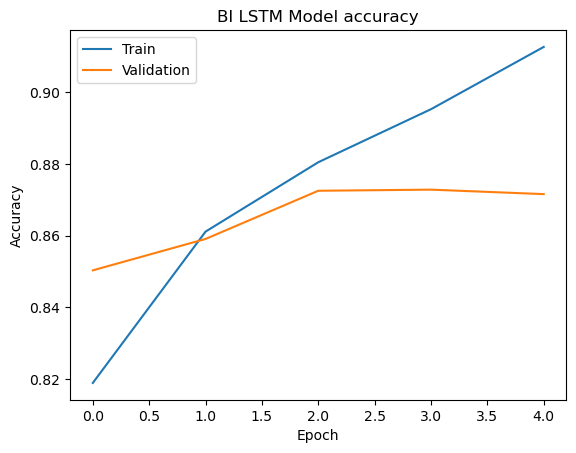

In [25]:
# Plot RNN training & validation accuracy values
plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.title('BI LSTM Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Here below we are constructing and plotting the confusion matrix

250/250 [==============================] - 16s 64ms/step


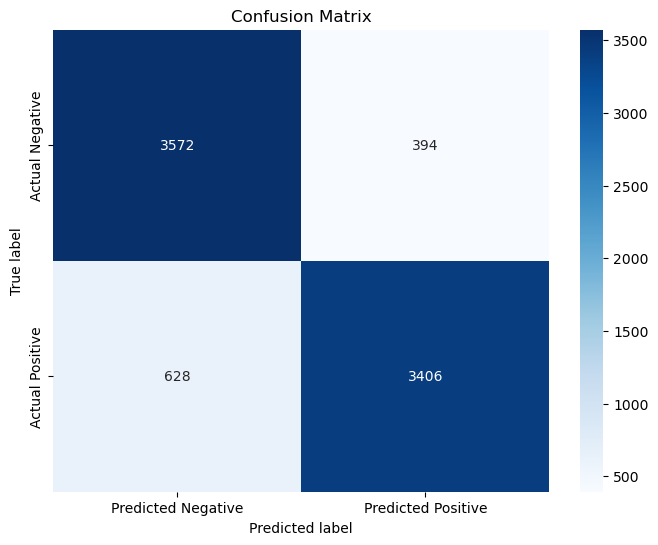

In [26]:
# Evaluate the model predictions on test data
predictions = bi_lstm_model.predict(X_test_pad)
binary_predictions = np.round(predictions).flatten()

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, binary_predictions)

# Display the confusion matrix graphically
plot_confusion_matrix(conf_matrix)

## Model Accuracy Comparision

Here we are evaluating the accuracies that we achieved after running the three models on the dataset. We are displaying a graph to see the different accuracies that we achieved after running the model.

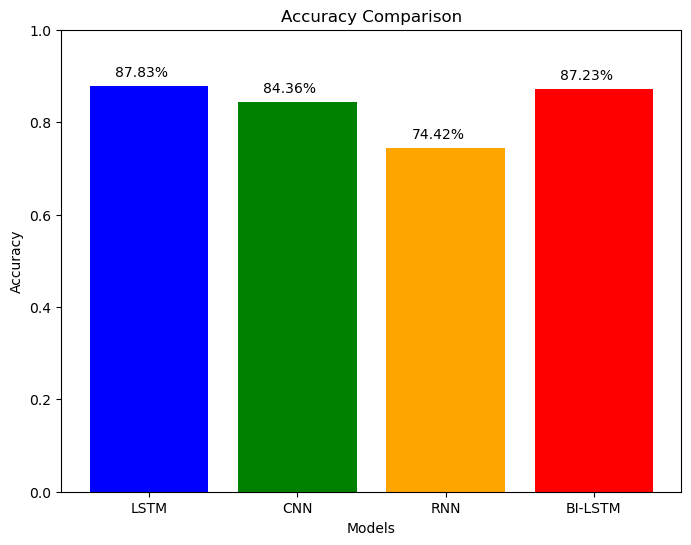

In [27]:
models = ['LSTM', 'CNN', 'RNN', 'BI-LSTM']
accuracies = [accuracy, cnn_accuracy, rnn_accuracy, bi_lstm_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy values (0 to 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Annotate bars with accuracy values in percentage
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{accuracy*100:.2f}%', ha='center')

plt.show()

## References

https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e

https://www.tensorflow.org/text/tutorials/word2vec

https://sh-tsang.medium.com/tutorial-a-good-toy-dataset-for-lstm-model-89e99063610c

https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/

https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network

https://www.analyticsvidhya.com/blog/2022/07/training-cnn-from-scratch-using-the-custom-dataset/